In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors


import random
import math
import time

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
import operator 

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Last Update : Nov. 5, 2020. Update to latest records for better information.

In [2]:
#using datasets from John Hopkins University github
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-05-2020.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/11-05-2020.csv')

In [3]:
#Latest Data
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-06 05:24:55,33.93911,67.709953,41935,1554,34440,5941.0,Afghanistan,107.723573,3.705735
1,NaN,NaN,NaN,Albania,2020-11-06 05:24:55,41.15330,20.168300,22721,543,11696,10482.0,Albania,789.526722,2.389860
2,NaN,NaN,NaN,Algeria,2020-11-06 05:24:55,28.03390,1.659600,60169,2011,41244,16914.0,Algeria,137.212244,3.342253
3,NaN,NaN,NaN,Andorra,2020-11-06 05:24:55,42.50630,1.521800,5135,75,3858,1202.0,Andorra,6645.958714,1.460565
4,NaN,NaN,NaN,Angola,2020-11-06 05:24:55,-11.20270,17.873900,12102,299,5350,6453.0,Angola,36.821948,2.470666


In [4]:
#Confirmed Cases - Number of Confirmed Cases along different points in time
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816


In [5]:
#Summary- US Medical Data
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-11-06 05:30:35,32.3182,-86.9023,199158,3026,84471.0,111661.0,1.0,4061.808804,1379107.0,NaN,1.519397,84000001,USA,28126.758423,NaN
1,Alaska,US,2020-11-06 05:30:35,61.3707,-152.4044,18174,84,7125.0,10965.0,2.0,2484.331107,781826.0,NaN,0.462199,84000002,USA,106873.261385,NaN
2,American Samoa,US,2020-11-06 05:30:35,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1768.0,NaN,NaN,16,ASM,3177.512985,NaN
3,Arizona,US,2020-11-06 05:30:35,33.7298,-111.4312,252768,6087,42317.0,204364.0,4.0,3472.699928,1826629.0,NaN,2.408137,84000004,USA,25095.480426,NaN
4,Arkansas,US,2020-11-06 05:30:35,34.9697,-92.3731,117360,2037,104816.0,10507.0,5.0,3888.920553,1392905.0,NaN,1.735685,84000005,USA,46156.244740,NaN


In [6]:
cols = confirmed_df.keys()

In [7]:
#getting dates by subsetting colums from our data frames
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
#Creating arrays for our different parameters
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
recovery_rate = [] 
total_recovered = [] 
 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)

In [10]:
#Calculating daily increase and moving average
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size = 1 week
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


In [11]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

### Future Forecasting

In [12]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [13]:
#Convert integer into datetime format

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [14]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)

### Modelling for Predicting no. of confirmed cases. 
#### I am using support vector machine, bayesian ridge, and linear regression models.

# SUPPORT VECTOR MACHINE (SVM)


In [15]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 2747469.6016690284
MSE: 7562212388757.582


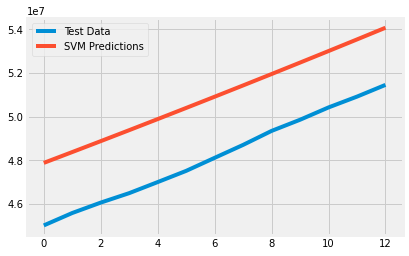

In [16]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

# LINEAR REGRESSION

In [17]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [18]:
#Polynomial Regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 2550761.6796020567
MSE: 7184021319967.309


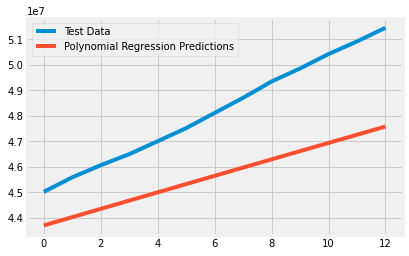

In [19]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

# Bayesian Ridge Polynomial Regression

In [20]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [21]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': True,
 'lambda_2': 1e-06,
 'lambda_1': 0.001,
 'alpha_2': 0.0001,
 'alpha_1': 1e-07}

In [22]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 2215558.5326543744
MSE: 5444990533266.363


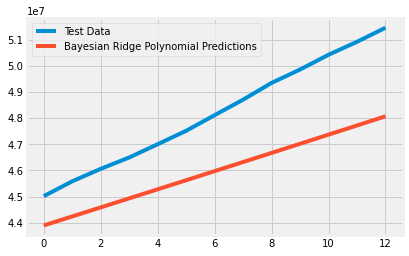

In [23]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

# VISUALIZATIONS - No. of confirmed cases, active cases, deaths, recoveries

In [24]:
# function for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

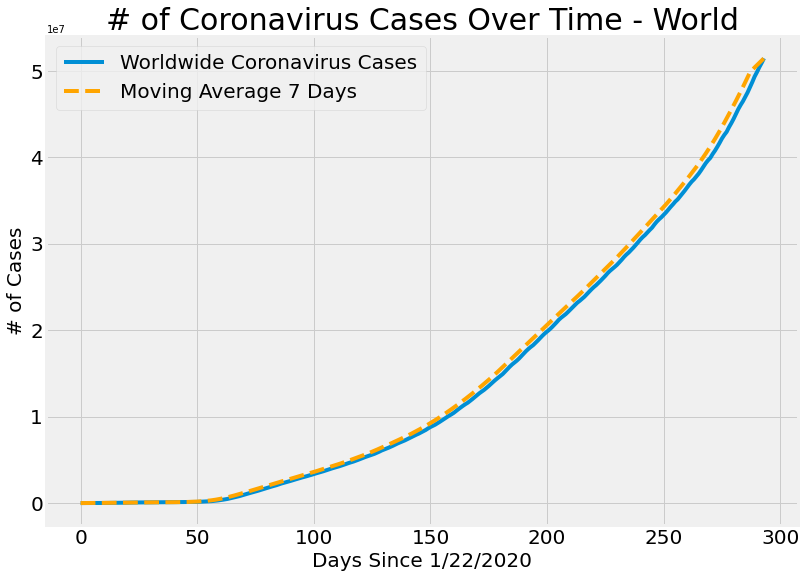

In [25]:
#No. of Coronavirus Cases Over Time (Worldwide) 
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time - World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

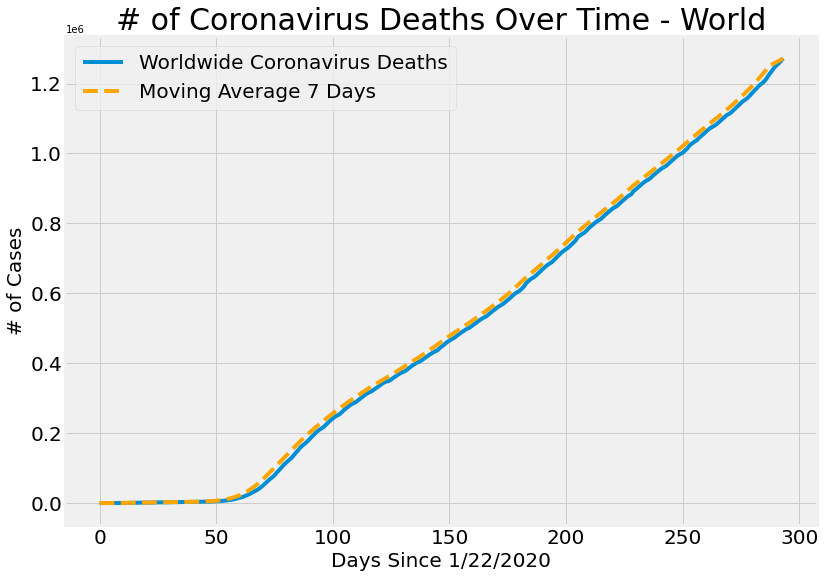

In [26]:
# No. of Coronavirus Deaths Over Time (Worldwide)
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time - World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

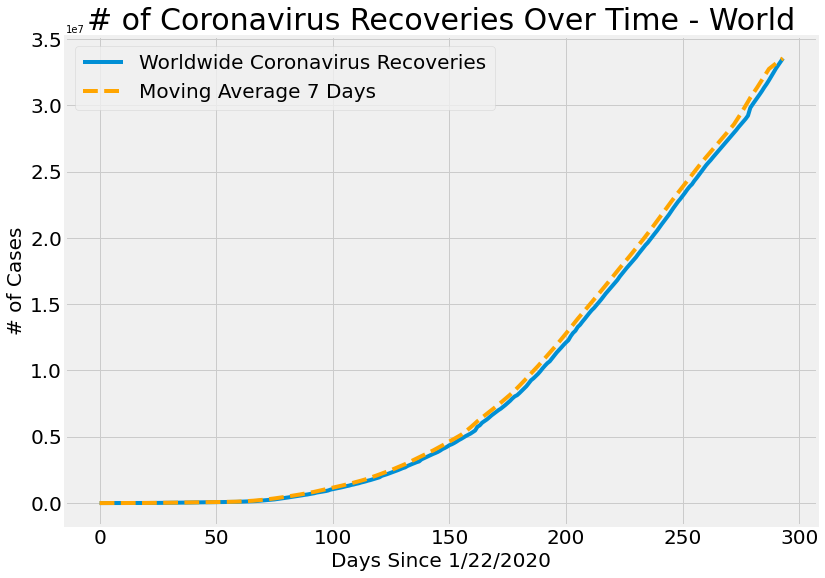

In [27]:
# No. of Coronavirus Recoveries Over Time - Worldwide
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time - World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### We can use Moving Average to calculate daily increase in cases, deaths and recoveries

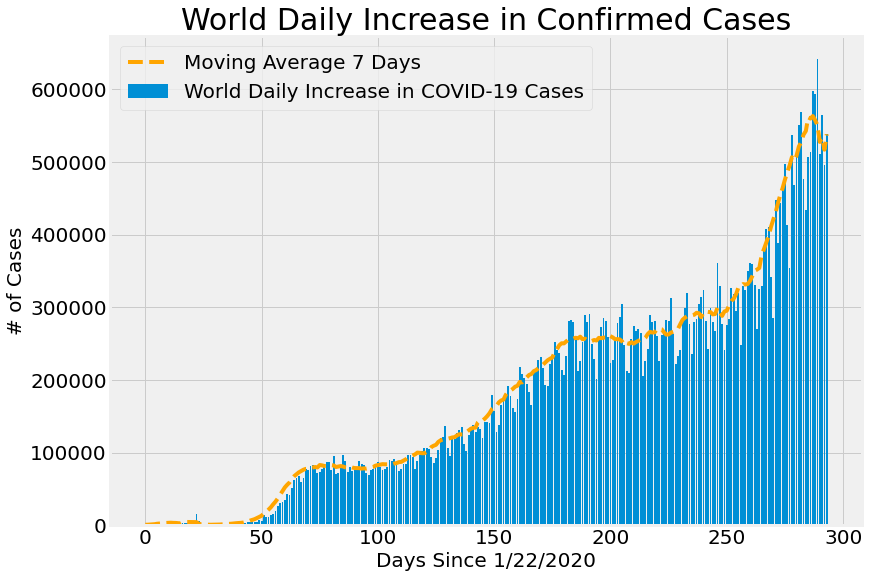

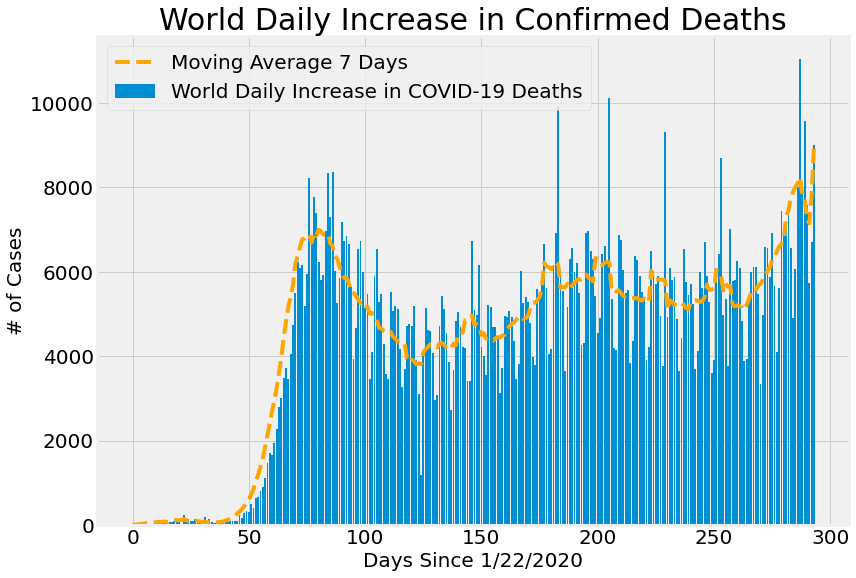

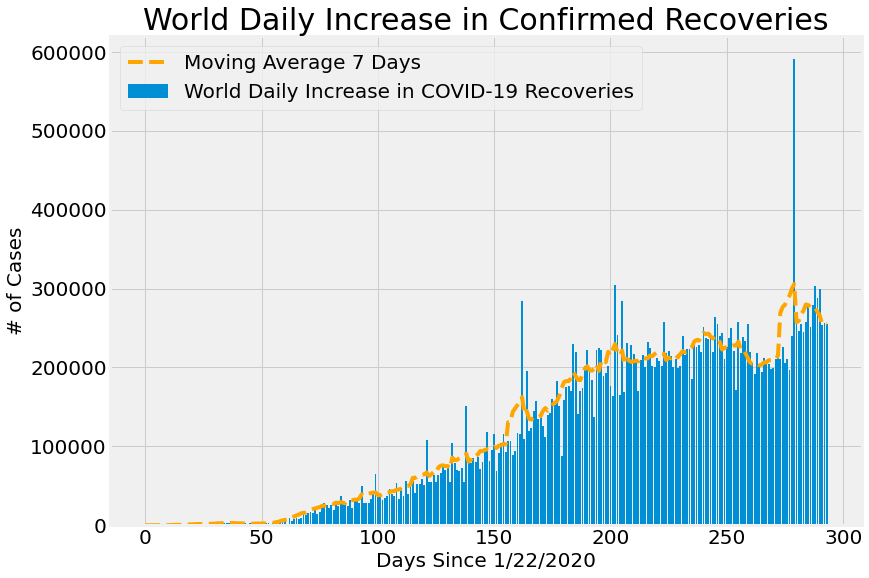

In [54]:
#Confirmed Cases
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increase in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Confirmed Deaths
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increase in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Confirmed Recoveries
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increase in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [56]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 7 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(12, 9))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(12, 9))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increase in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(12, 9))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increase in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(12, 9))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increase in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
# custom function for getting a country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)

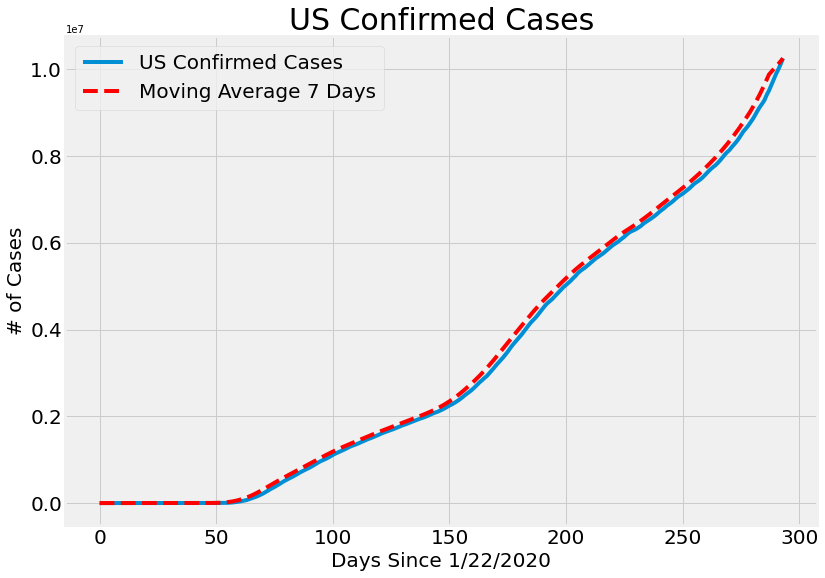

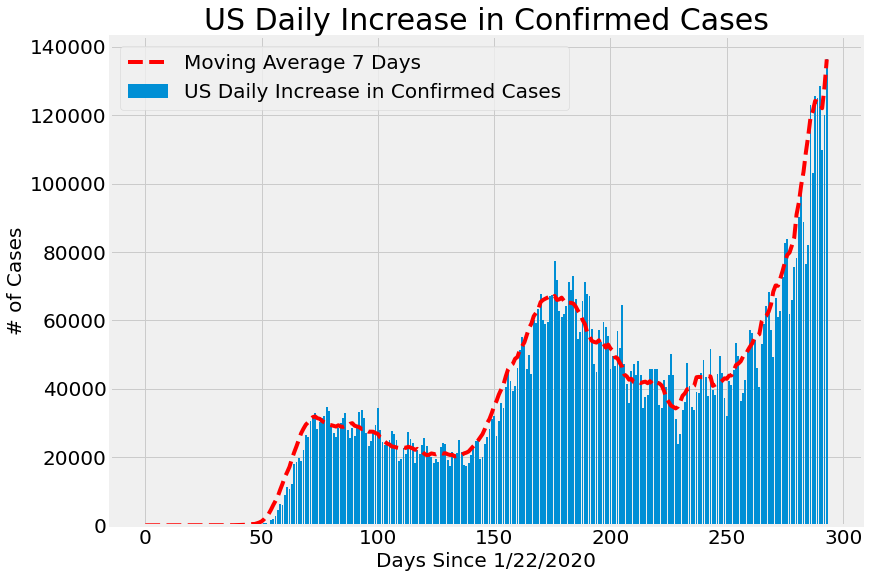

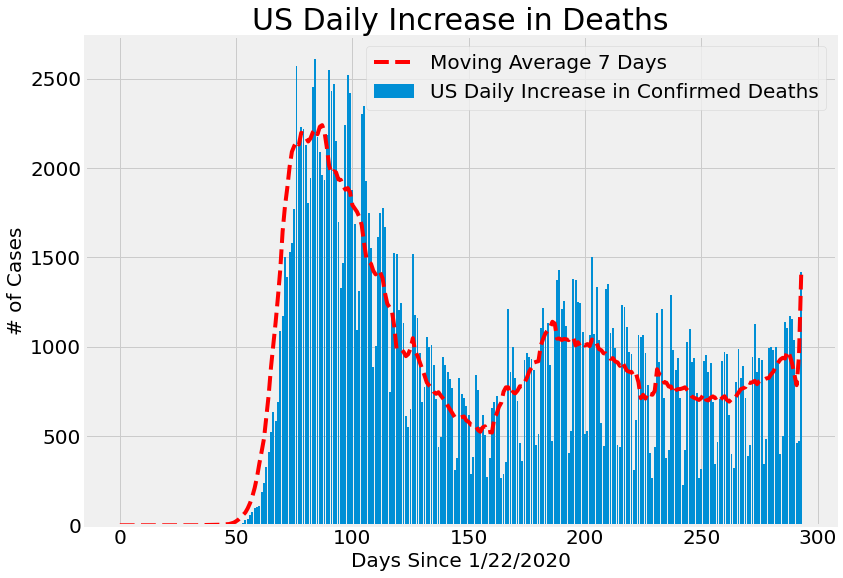

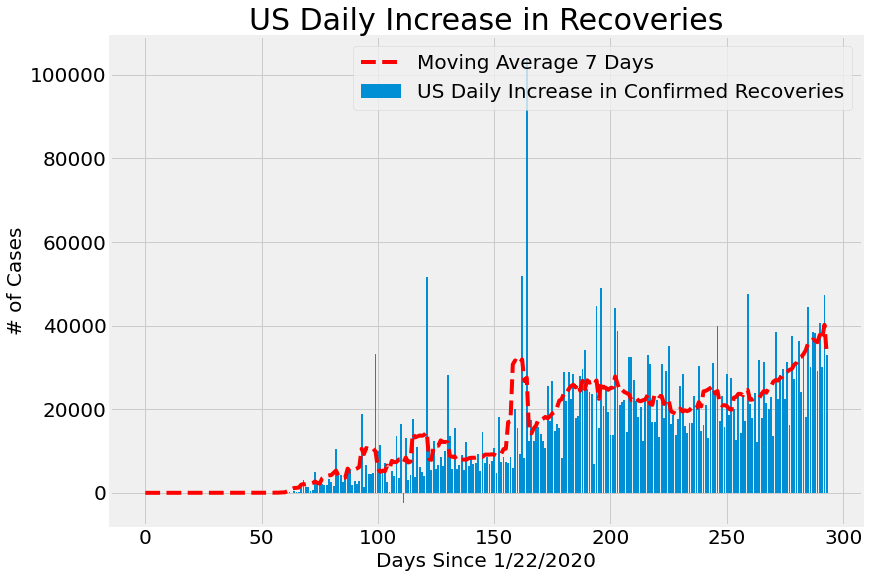

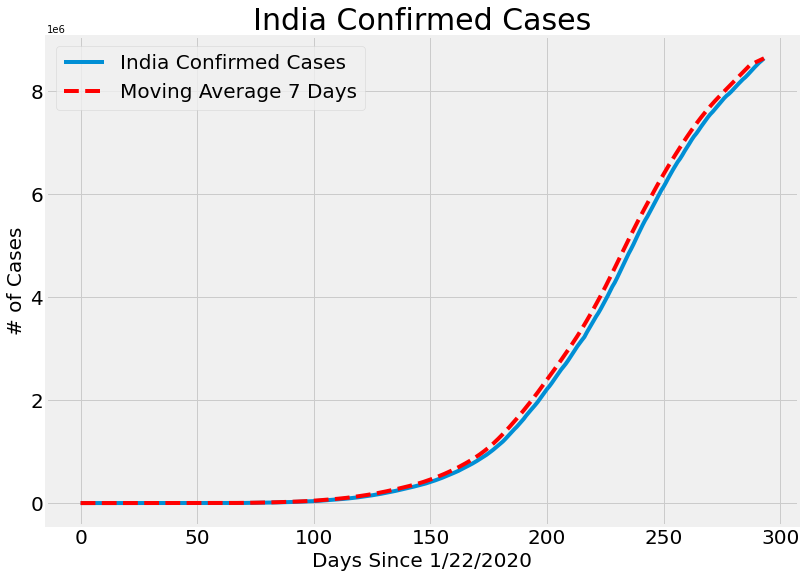

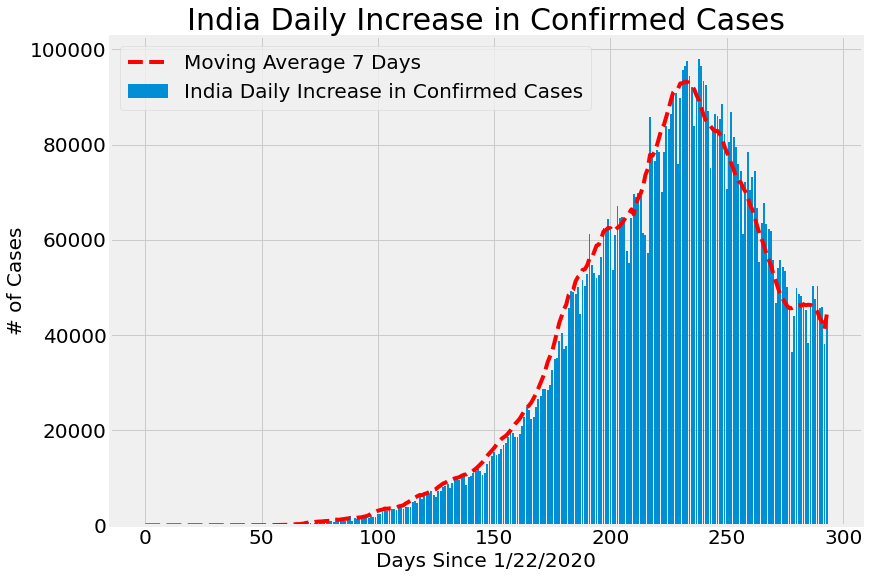

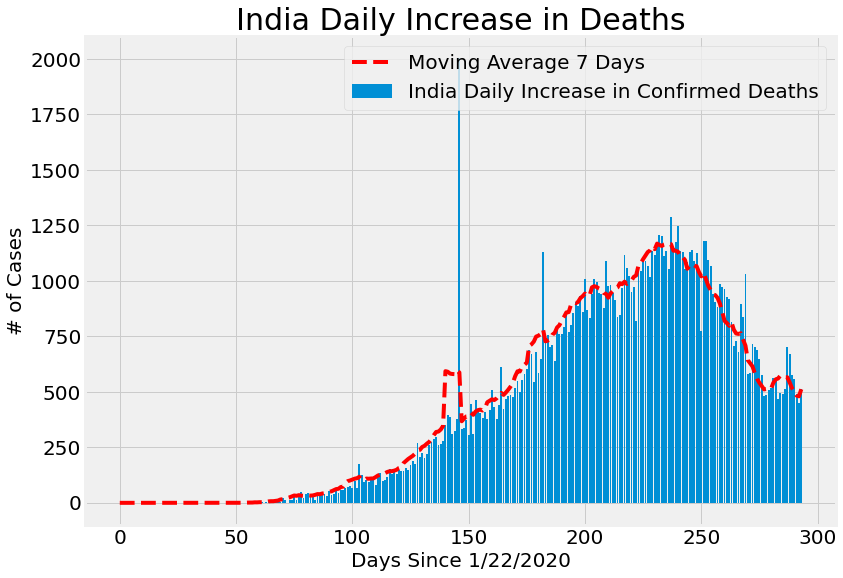

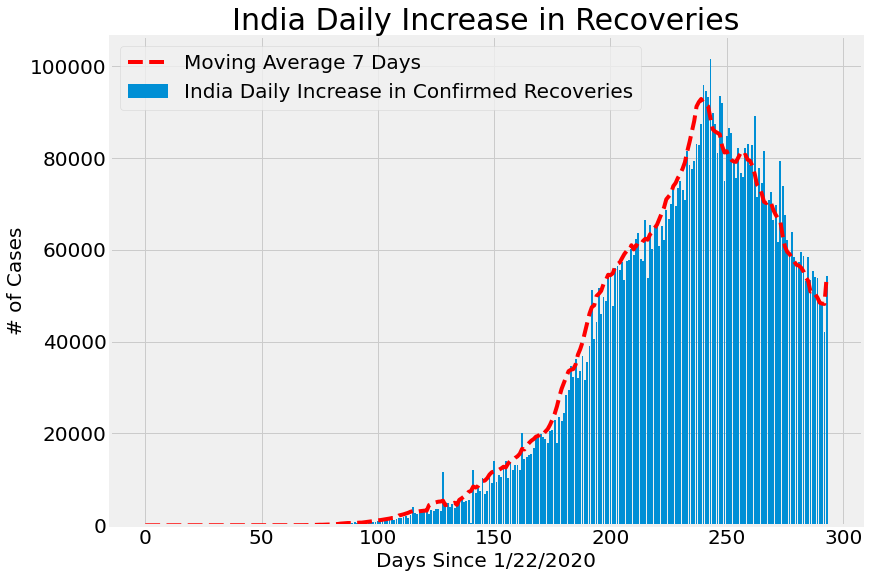

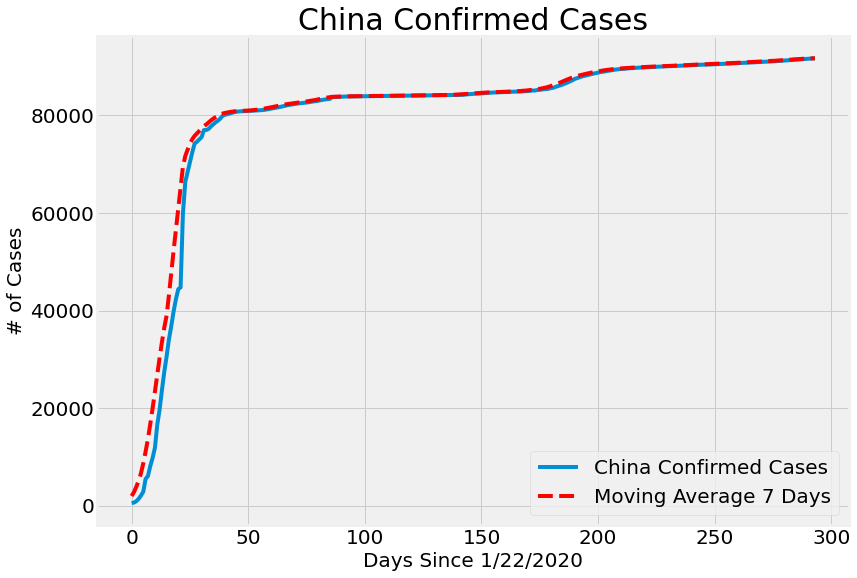

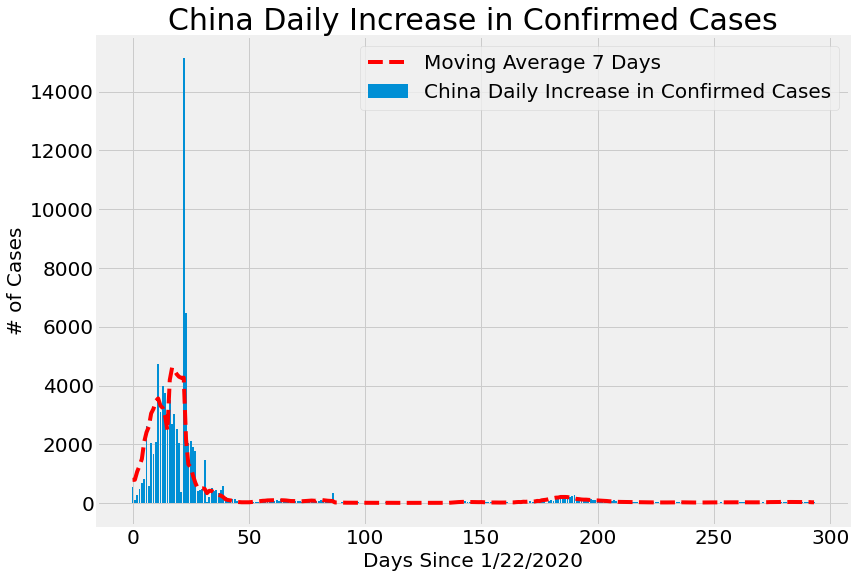

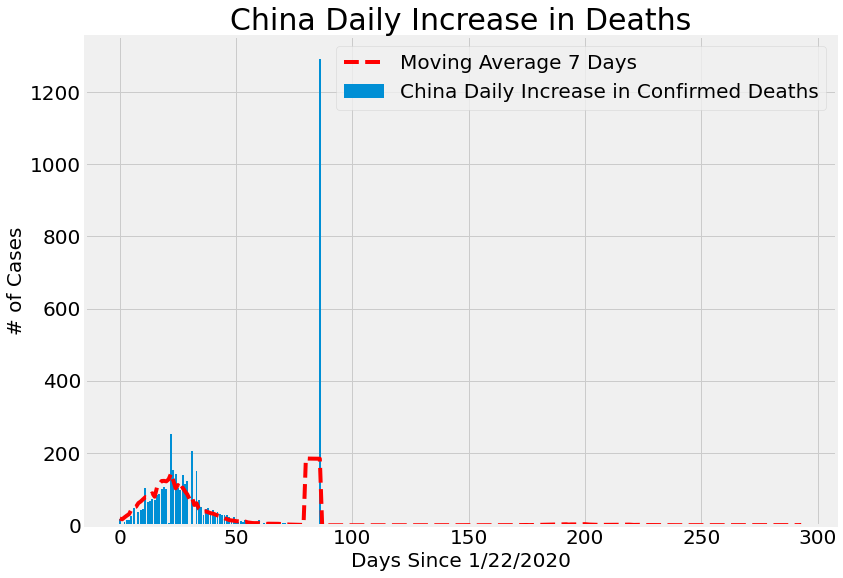

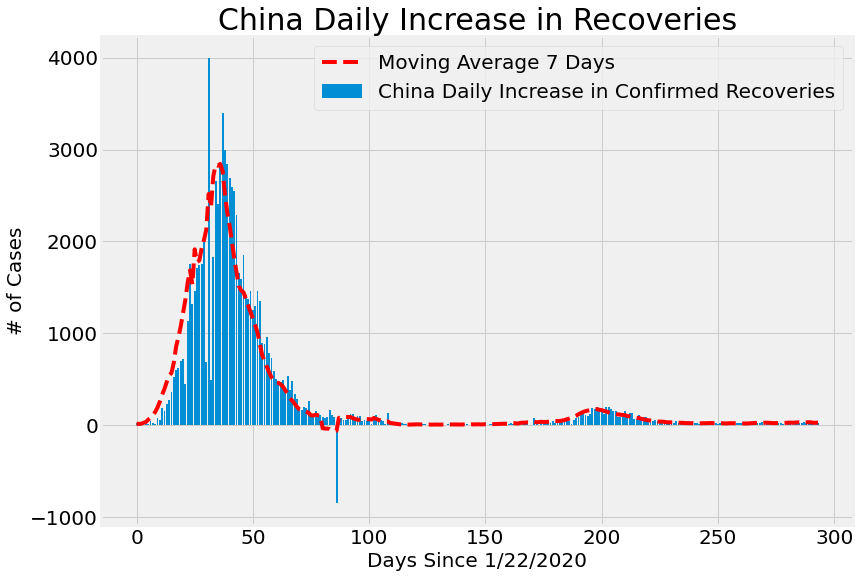

In [57]:
countries = ['US', 'India', 'China'] 

for country in countries:
    country_visualizations(country)

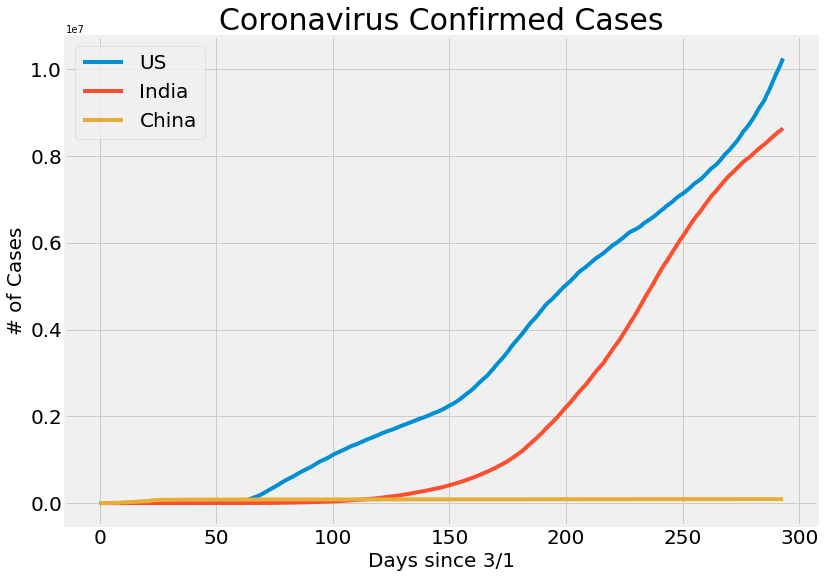

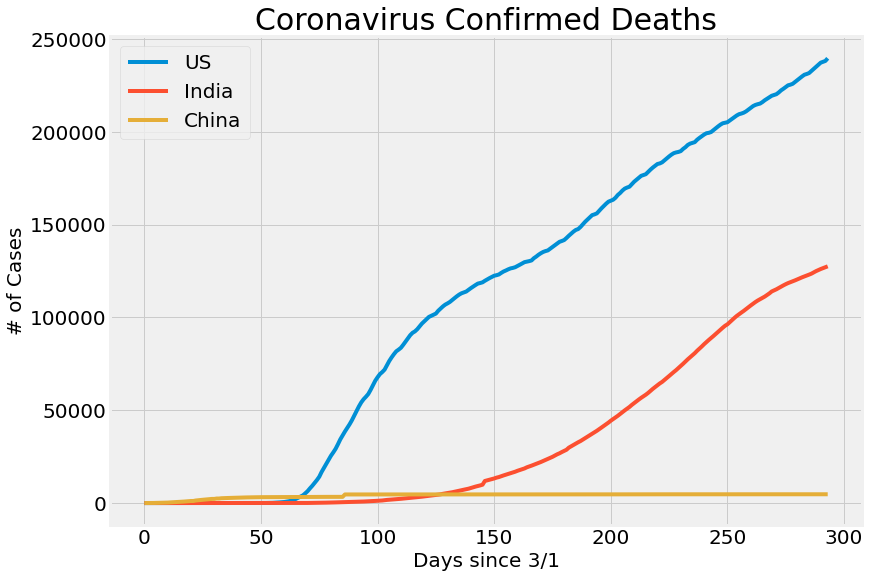

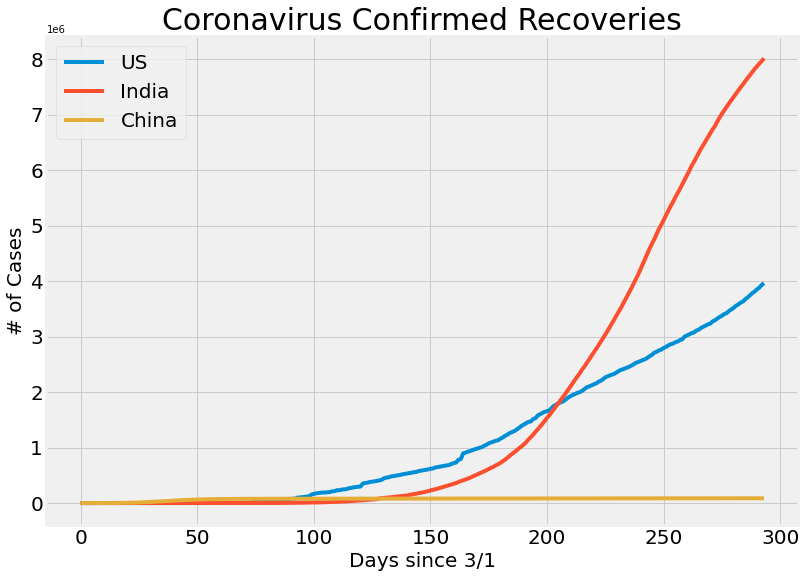

In [31]:
# Country Comparison using Simple Line graphs
# removed redundant bars

compare_countries = ['US', 'India', 'China']
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(12, 9))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### Lets use our prediction models (SVM, Linear, Bayesian) to predict confirmed cases

In [32]:
#Custom function for plotting our models
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(12, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

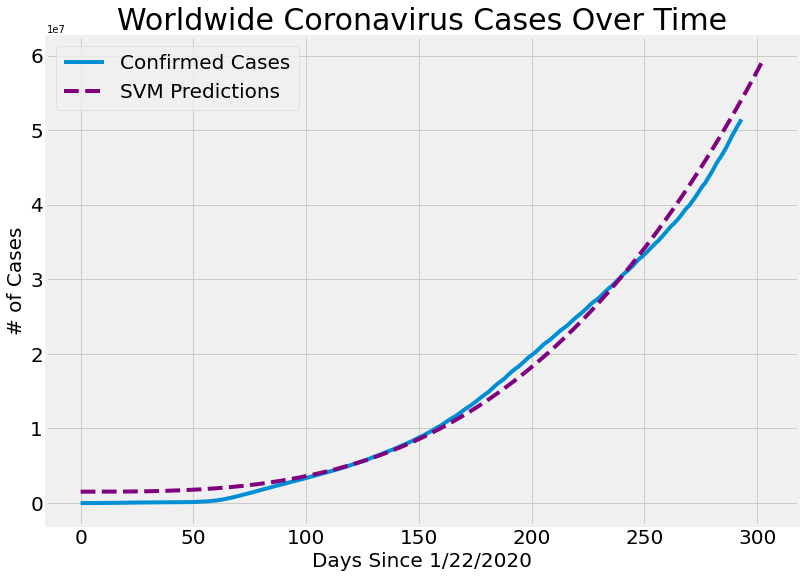

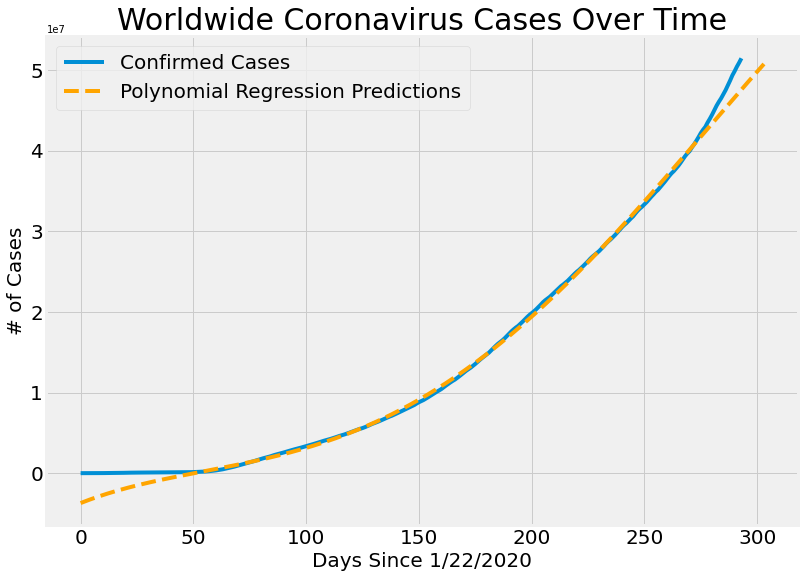

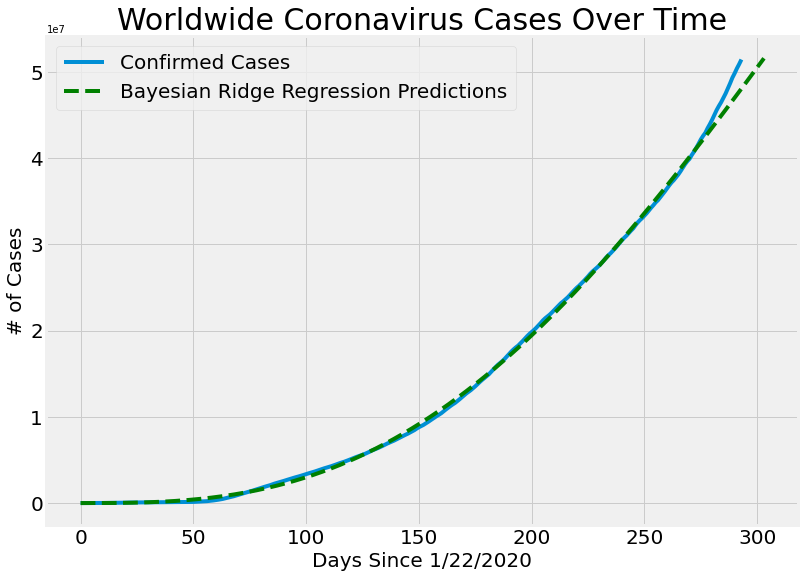

In [33]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple') #SVM
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange') #Poly-Reg
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green') #Bayesian

In [34]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/11/2020,54616187.000000
1,11/12/2020,55159744.000000
2,11/13/2020,55706998.000000
3,11/14/2020,56257963.000000
4,11/15/2020,56812650.000000
5,11/16/2020,57371072.000000
6,11/17/2020,57933242.000000
7,11/18/2020,58499172.000000
8,11/19/2020,59068876.000000
9,11/20/2020,59642364.000000


In [35]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,11/11/2020,47898241.000000
1,11/12/2020,48218298.000000
2,11/13/2020,48537716.000000
3,11/14/2020,48856457.000000
4,11/15/2020,49174482.000000
5,11/16/2020,49491752.000000
6,11/17/2020,49808229.000000
7,11/18/2020,50123873.000000
8,11/19/2020,50438643.000000
9,11/20/2020,50752500.000000


In [36]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,11/11/2020,48420210.000000
1,11/12/2020,48771920.000000
2,11/13/2020,49124063.000000
3,11/14/2020,49476621.000000
4,11/15/2020,49829575.000000
5,11/16/2020,50182907.000000
6,11/17/2020,50536598.000000
7,11/18/2020,50890628.000000
8,11/19/2020,51244979.000000
9,11/20/2020,51599631.000000


# Summarising our Analyses

#### Data Tables

In [37]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-06 05:24:55,33.939110,67.709953,41935,1554,34440,5941.0,Afghanistan,107.723573,3.705735
1,NaN,NaN,NaN,Albania,2020-11-06 05:24:55,41.153300,20.168300,22721,543,11696,10482.0,Albania,789.526722,2.389860
2,NaN,NaN,NaN,Algeria,2020-11-06 05:24:55,28.033900,1.659600,60169,2011,41244,16914.0,Algeria,137.212244,3.342253
3,NaN,NaN,NaN,Andorra,2020-11-06 05:24:55,42.506300,1.521800,5135,75,3858,1202.0,Andorra,6645.958714,1.460565
4,NaN,NaN,NaN,Angola,2020-11-06 05:24:55,-11.202700,17.873900,12102,299,5350,6453.0,Angola,36.821948,2.470666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,NaN,NaN,NaN,West Bank and Gaza,2020-11-06 05:24:55,31.952200,35.233200,56672,508,48680,7484.0,West Bank and Gaza,1110.907246,0.896386
3957,NaN,NaN,NaN,Western Sahara,2020-11-06 05:24:55,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3958,NaN,NaN,NaN,Yemen,2020-11-06 05:24:55,15.552727,48.516388,2063,601,1375,87.0,Yemen,6.916791,29.132332
3959,NaN,NaN,NaN,Zambia,2020-11-06 05:24:55,-13.133897,27.849332,16770,349,15827,594.0,Zambia,91.220845,2.081097


### Lets compare countries

In [38]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [39]:
country_confirmed_cases = []
country_death_cases = [] 
country_recovery_cases = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())

In [40]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Confirmed': country_confirmed_cases,
                          'Deaths': country_death_cases, 'Recoveries' : country_recovery_cases})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

,Country Name,Confirmed,Deaths,Recoveries
0,US,9660786,235127,3781751
1,India,8411724,124985,7765966
2,Brazil,5590025,161106,5078162
3,Russia,1699695,29285,1271349
4,France,1648989,39088,129759
5,Spain,1306316,38486,150376
6,Argentina,1217028,32766,1030137
7,United Kingdom,1126469,48210,2931
8,Colombia,1117977,32209,1011166
9,Mexico,949197,93772,809063


##### *** We can see USA, India, and Brazil have the highest cases.
#### Let's analyze data on state/province level

In [41]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    state_recovery_cases = []
    #state_active = [] 
    #state_incidence_rate = [] 
    #state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
        # state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum()) 
           
      
    state_df = pd.DataFrame({'State Name': states, 'Confirmed Cases': state_confirmed_cases,
                              'Deaths': state_death_cases}) #, 'Recoveries' : state_recovery_cases})
    # number of cases per country/region
    return state_df

##### Data Table for USA

In [42]:
#USA - State wise
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

,State Name,Confirmed Cases,Deaths
0,Texas,969490,18907
1,California,956854,17860
2,Florida,827380,16961
3,New York,518812,33857
4,Illinois,453738,10313
5,Georgia,399625,8126
6,North Carolina,285661,4548
7,Tennessee,271771,3509
8,Wisconsin,263571,2194
9,Arizona,252768,6087


##### Data Table for India

In [43]:
#India - State wise
india_table = country_table('India')
india_table.style.background_gradient(cmap='Oranges')

,State Name,Confirmed Cases,Deaths
0,Maharashtra,1703444,44804
1,Karnataka,838929,11312
2,Andhra Pradesh,835953,6757
3,Tamil Nadu,736777,11272
4,Uttar Pradesh,491354,7131
5,Kerala,466466,1613
6,Delhi,416653,6769
7,West Bengal,393524,7122
8,Odisha,297274,1378
9,Telangana,247284,1366


# Visualizations 

In [44]:
total_world_cases = np.sum(country_confirmed_cases)
us_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = total_world_cases - us_confirmed

print('Outside United States {} cases ({}%):'.format(outside_us_confirmed, np.round((outside_us_confirmed/total_world_cases)*100, 1)))
print('United States {} cases ({}%)'.format(us_confirmed, np.round((us_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside United States 39072767 cases (80.2%):
United States 9660786 cases (19.8%)
Total: 48733553 cases


In [45]:
# Showing top 15 countries with the most confirmed cases, the rest are grouped into  "Others" category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

### Bar Charts

In [46]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

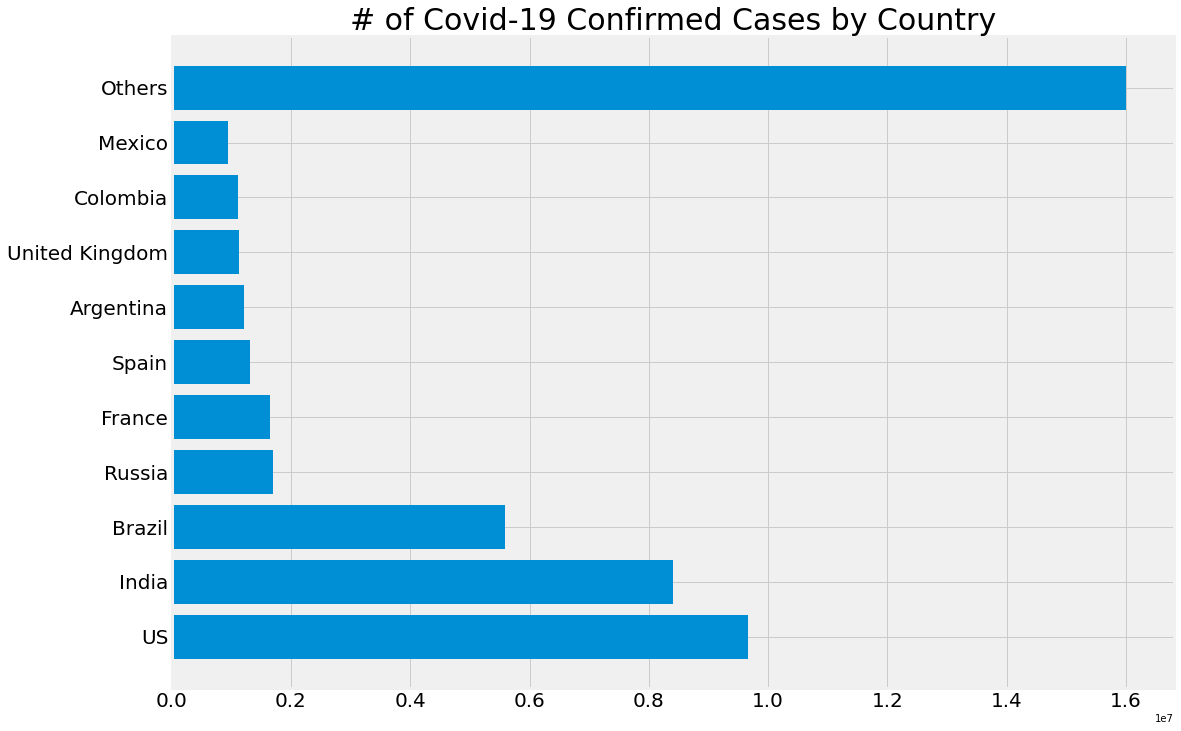

In [47]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases by Country')

In [48]:
# Plotting countries with regional/state data 

def plot_bar_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_bar_graphs(regions_5,confirmed_cases_5, title)
    else:
        plot_bar_graphs(regions,confirmed_cases, title)

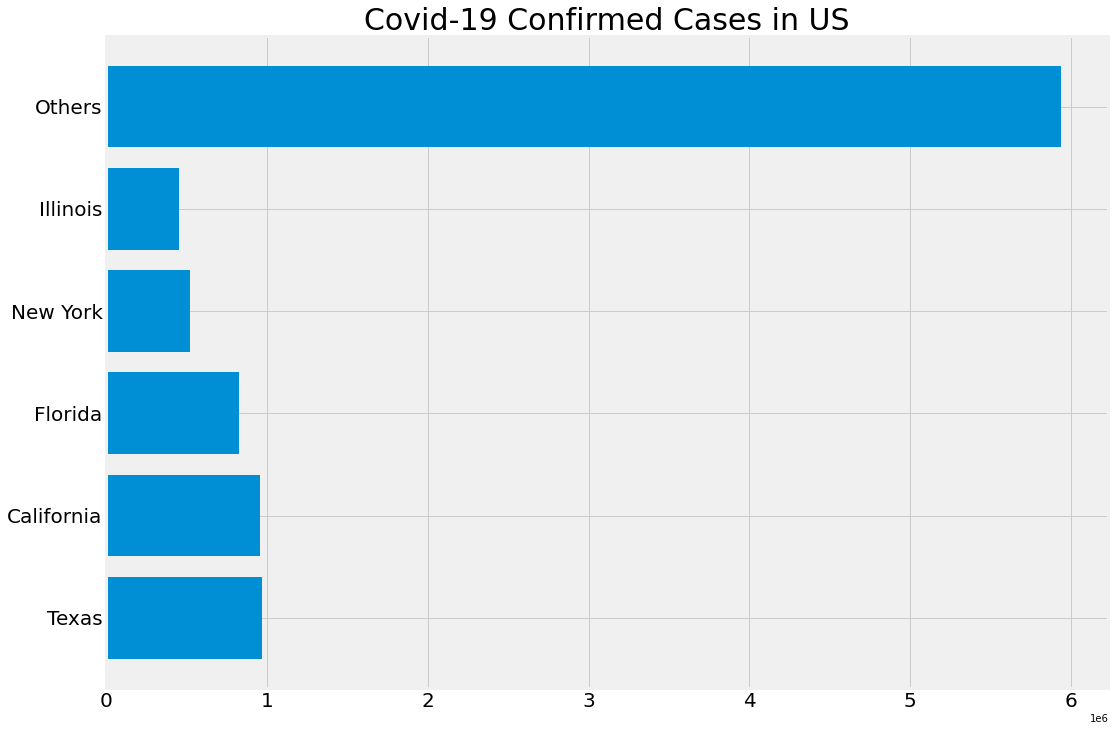

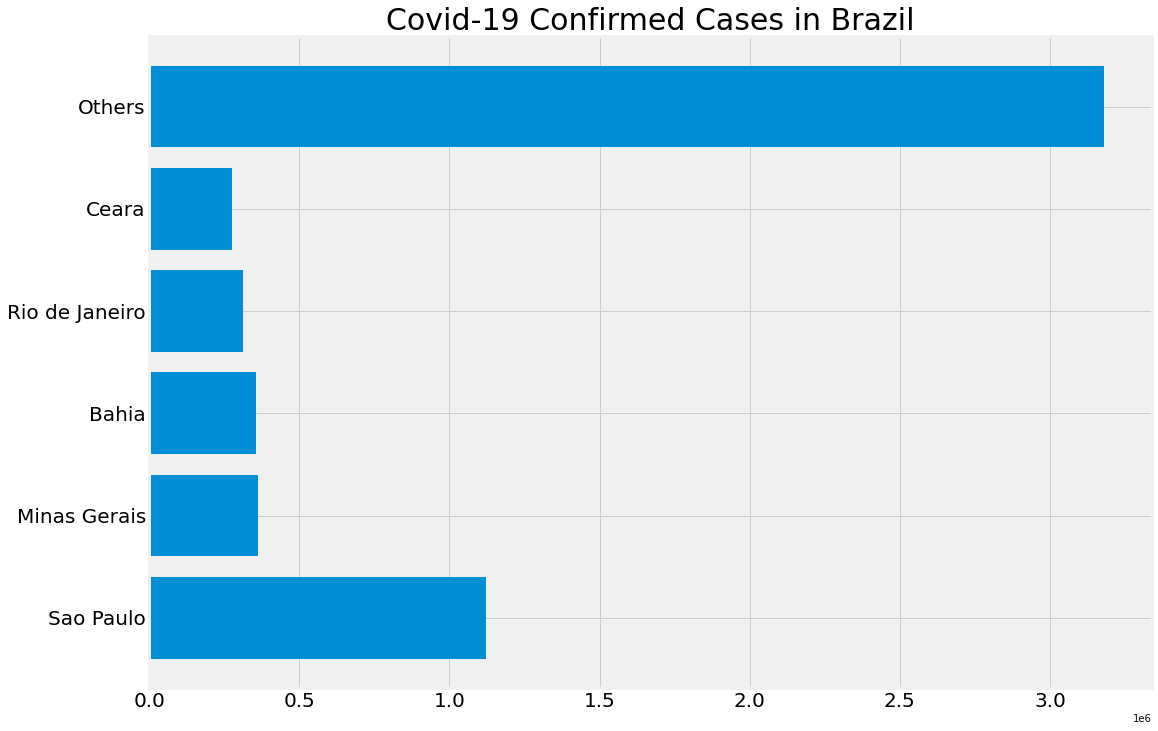

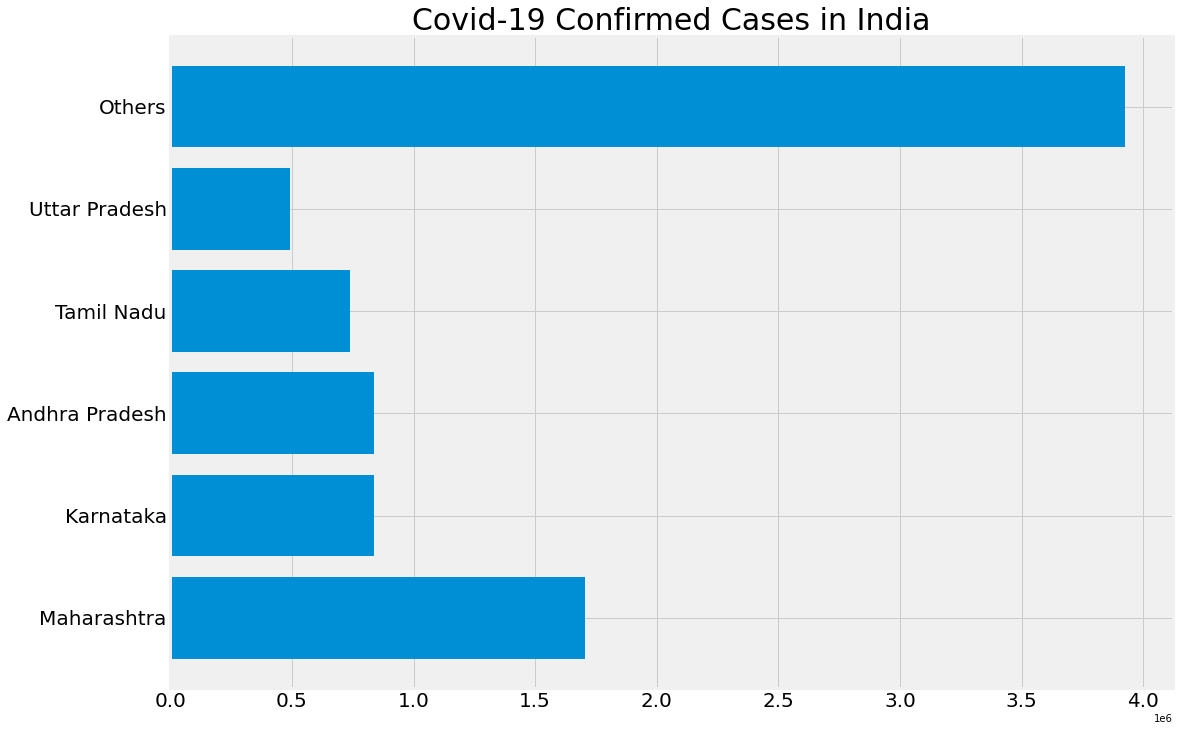

In [49]:
bar_countries = ['US', 'Brazil', 'India']

for i in bar_countries:
    plot_bar_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))

### Pie Charts

In [50]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=13)
    plt.show()

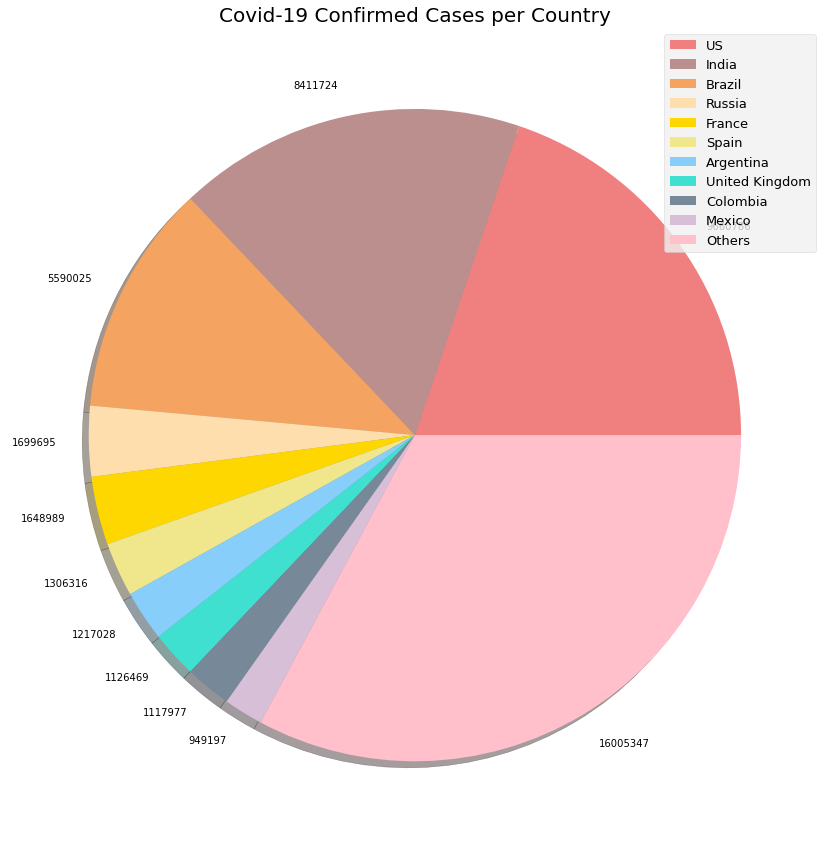

In [51]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [52]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

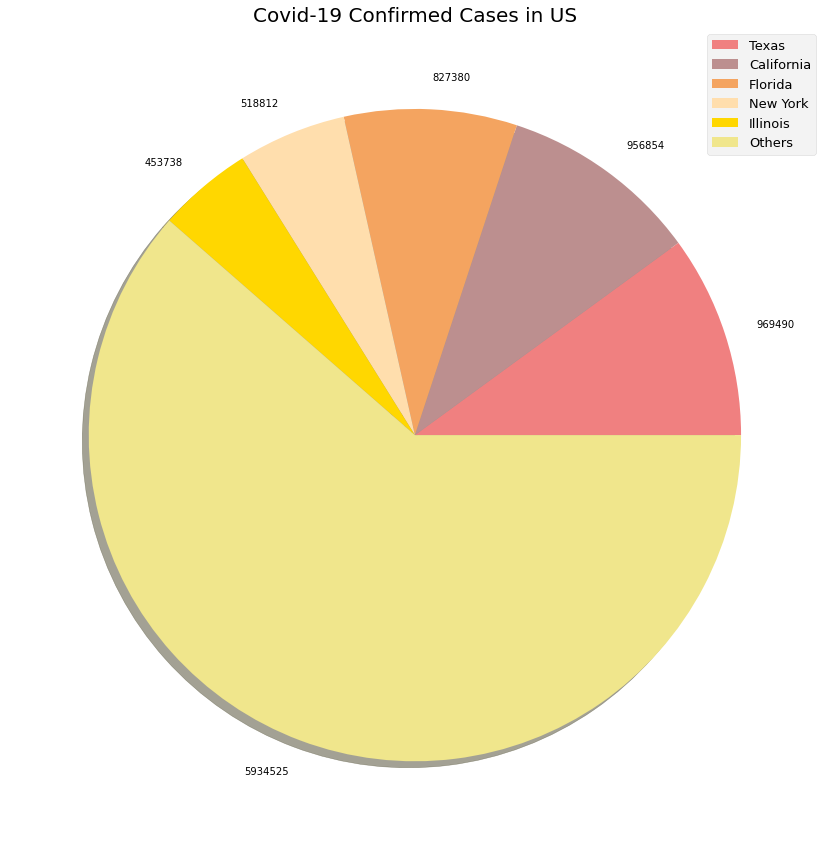

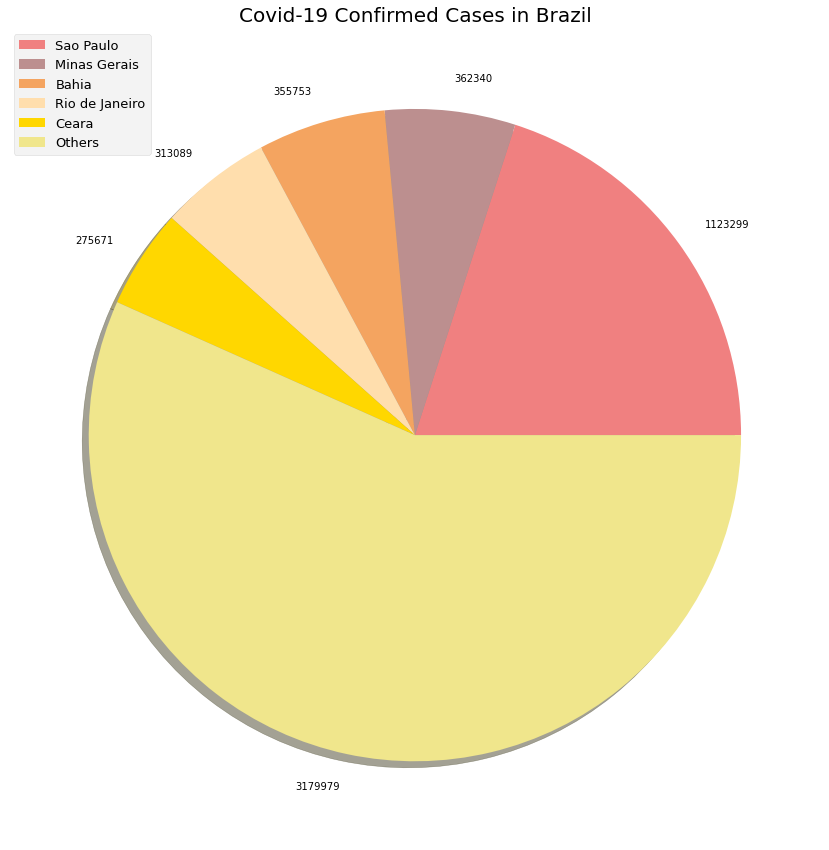

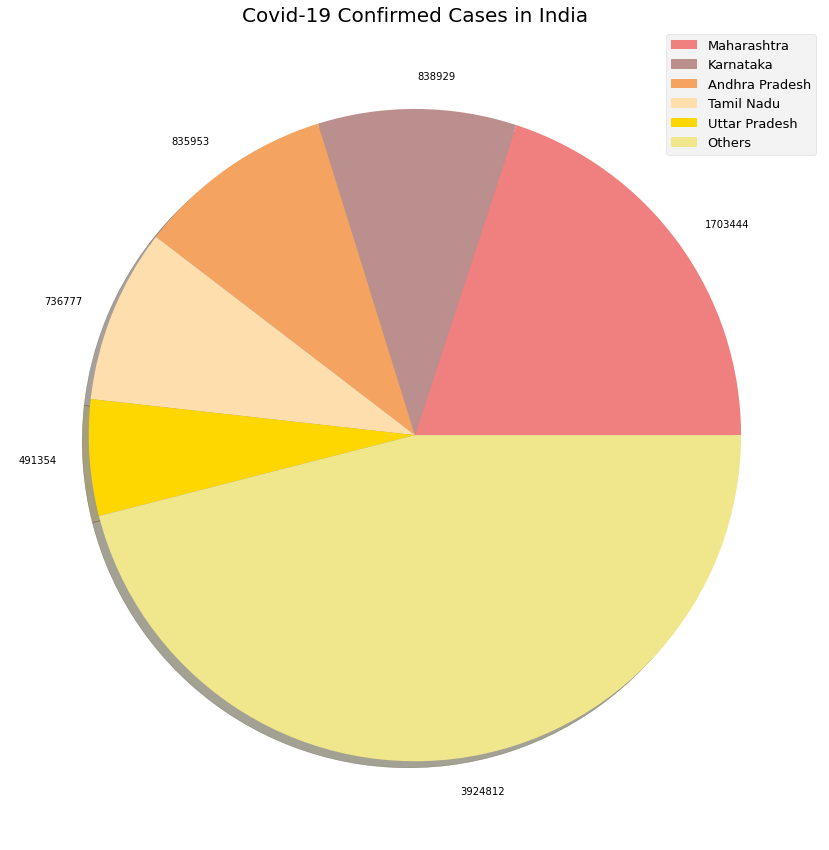

In [53]:
pie_chart_countries = ['US', 'Brazil', 'India']

for i in pie_chart_countries:
    plot_pie_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))